<a href="https://colab.research.google.com/github/ayman86/playground/blob/master/m_oraganal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#!wget https://figshare.com/ndownloader/files/3381290
#!unzip 3381290


In [75]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils.traceback_utils import include_frame


In [76]:
num_classes=2
image_size=224


In [77]:
data_genarater=ImageDataGenerator(preprocessing_function=preprocess_input)

In [78]:
train  = '/content/drive/MyDrive/Mdvdata/train'
test  = '/content/drive/MyDrive/Mdvdata/test'
#Therd step resize
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
testdata = tsdata.flow_from_directory(directory=test,target_size=(224,224))

input_shape = (224,224,3)

Found 14282 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.


In [79]:
model=Sequential()
model.add(VGG16(include_top=False,pooling='avg',weights='imagenet'))


In [80]:
model.add(Dense(num_classes,activation='softmax'))

In [81]:
model.layers[0].layers

In [82]:
model.layers[0].trainable=False
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_per_epoch_train=len(traindata)
step_per_epoch_vaild=len(testdata)
num_epoch=10


In [83]:
pach_size_train=64
pach_size_valid=64

hist = model.fit_generator(traindata,
                           steps_per_epoch = pach_size_train,
                           epochs = 50,
                           validation_data = testdata,
                           validation_steps =pach_size_valid
                           )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
64/64 [==============================] - 62s 955ms/step - loss: 0.6817 - accuracy: 0.5894 - val_loss: 0.6573 - val_accuracy: 0.6592
Epoch 2/50
64/64 [==============================] - 56s 877ms/step - loss: 0.6462 - accuracy: 0.6777 - val_loss: 0.6322 - val_accuracy: 0.7036
Epoch 3/50
64/64 [==============================] - 56s 877ms/step - loss: 0.6161 - accuracy: 0.7085 - val_loss: 0.6089 - val_accuracy: 0.7373
Epoch 4/50
64/64 [==============================] - 57s 902ms/step - loss: 0.5977 - accuracy: 0.7314 - val_loss: 0.5825 - val_accuracy: 0.7373
Epoch 5/50
64/64 [==============================] - 55s 871ms/step - loss: 0.5859 - accuracy: 0.7226 - val_loss: 0.5663 - val_accuracy: 0.7563
Epoch 6/50
64/64 [==============================] - 55s 870ms/step - loss: 0.5651 - accuracy: 0.7414 - val_loss: 0.5589 - val_accuracy: 0.7437
Epoch 7/50
64/64 [==============================] - 57s 893ms/step - loss: 0.5618 - accuracy: 0.7363 - val_loss: 0.5546 - val_accuracy: 0.7246

In [97]:
model.save('/content/drive/MyDrive/Mdvdata/model_saved.h5')


In [85]:
model.save_spec('/content/drive/MyDrive/Mdvdata/model_saved_1.h5')

([TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='vgg16_input')],
 {})

In [86]:
model.save_weights('/content/drive/MyDrive/Mdvdata/model_saved_2.h5')

In [87]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Mdvdata/model_saved.h5')

In [88]:
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size),shuffle=False)


Found 14282 images belonging to 2 classes.


In [89]:
test_score=model.evaluate(testdata)


112/112 [==============================] - 54s 472ms/step - loss: 0.4535 - accuracy: 0.7965


In [90]:
import matplotlib.pyplot as plt


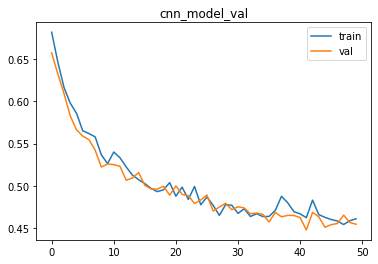

In [91]:
#plot
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('cnn_model_val')
plt.legend()
plt.show()

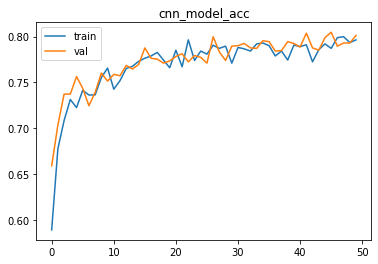

In [92]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('cnn_model_acc')
plt.legend()
plt.show()

In [93]:
#confusion matrix
import numpy as np
target = ['Melanoma','NotMelanoma']
label = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [94]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay

confusmatris
[[940 841]
 [882 899]]
classification_report
              precision    recall  f1-score   support

    Melanoma       0.52      0.53      0.52      1781
 NotMelanoma       0.52      0.50      0.51      1781

    accuracy                           0.52      3562
   macro avg       0.52      0.52      0.52      3562
weighted avg       0.52      0.52      0.52      3562



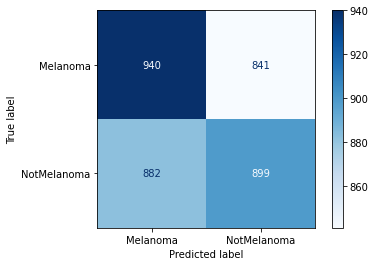

In [95]:
cm = confusion_matrix(testdata.classes,y_pred,labels=label)

print ('confusmatris')
print (confusion_matrix(testdata.classes,y_pred))

print ('classification_report')
print (classification_report(testdata.classes,y_pred, target_names = target))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target)
#disp = disp.plot(cmap = plt.cm.Blues,values_format='g')
disp = disp.plot(cmap = plt.cm.Blues,values_format='g')

plt.show()

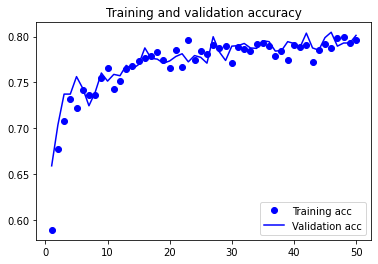

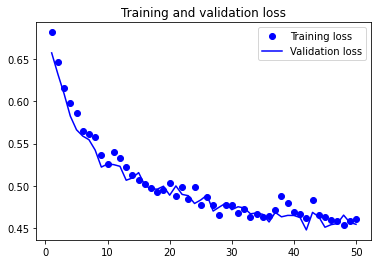

In [96]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()